In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Asegúrate de importar PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
datos = pd.read_csv(filepath_or_buffer="/users/angel/Downloads/comprar_alquilar.csv")
datos.dropna(inplace=True)

In [19]:
X = datos.drop('comprar', axis=1)  # Excluir la columna 'comprar'
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [21]:
explained_variance_ratio = pca.explained_variance_ratio_
total_variance = sum(explained_variance_ratio)
print(f"Varianza explicada por cada componente: {explained_variance_ratio}")
print(f"Varianza total explicada por 2 componentes: {total_variance:.2%}")

Varianza explicada por cada componente: [0.29913557 0.23294923]
Varianza total explicada por 2 componentes: 53.21%


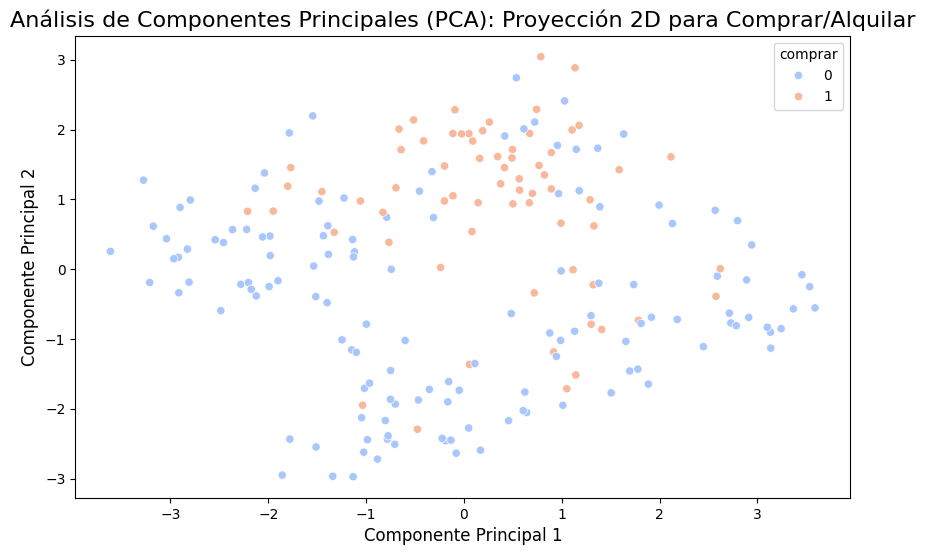

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=datos['comprar'], palette='coolwarm')
plt.title('Análisis de Componentes Principales (PCA): Proyección 2D para Comprar/Alquilar', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.show()

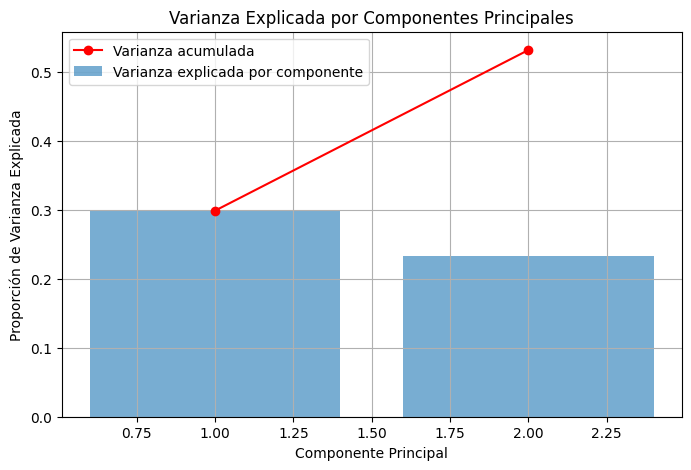

In [23]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, 3), explained_variance_ratio, alpha=0.6, label='Varianza explicada por componente')
plt.plot(range(1, 3), np.cumsum(explained_variance_ratio), marker='o', color='red', label='Varianza acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.legend()
plt.grid(True)
plt.show()